In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## For url

In [4]:
import urllib.request
#Pass the given url.
url="ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt"
# For data
data="co2_mm_mlo.txt"
# We will send request to load our data.
urllib.request.urlretrieve(url,data)

('co2_mm_mlo.txt', <email.message.Message at 0x25874defee0>)

In [5]:
#Now my data is in string form so i need to do data munging to get data into arrays.
df_=np.genfromtxt(data,skip_header=60) # Skipping initial lines to get our data.


In [6]:
df_

array([[ 1.9580000e+03,  5.0000000e+00,  1.9583699e+03, ...,
        -1.0000000e+00, -9.9900000e+00, -9.9000000e-01],
       [ 1.9580000e+03,  6.0000000e+00,  1.9584548e+03, ...,
        -1.0000000e+00, -9.9900000e+00, -9.9000000e-01],
       [ 1.9580000e+03,  7.0000000e+00,  1.9585370e+03, ...,
        -1.0000000e+00, -9.9900000e+00, -9.9000000e-01],
       ...,
       [ 2.0230000e+03,  5.0000000e+00,  2.0233750e+03, ...,
         3.1000000e+01,  6.9000000e-01,  2.4000000e-01],
       [ 2.0230000e+03,  6.0000000e+00,  2.0234583e+03, ...,
         2.9000000e+01,  5.4000000e-01,  1.9000000e-01],
       [ 2.0230000e+03,  7.0000000e+00,  2.0235417e+03, ...,
         3.1000000e+01,  5.7000000e-01,  2.0000000e-01]])

In [7]:
#Converting into dataframe.
df=pd.DataFrame(df_)

In [8]:
df.head()

,0,1,2,3,4,5,6,7
0,1958.0,5.0,1958.3699,317.51,314.71,-1.0,-9.99,-0.99
1,1958.0,6.0,1958.4548,317.24,315.14,-1.0,-9.99,-0.99
2,1958.0,7.0,1958.5370,315.86,315.18,-1.0,-9.99,-0.99
3,1958.0,8.0,1958.6219,314.93,316.18,-1.0,-9.99,-0.99
4,1958.0,9.0,1958.7068,313.20,316.08,-1.0,-9.99,-0.99


In [9]:
df.shape

(783, 8)

In [11]:
#Check for null values.
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

# # Extract the monthly averages of measured CO2 from a data column named average,

In [14]:
mon_avg=df[3]
mon_avg

0      317.51
1      317.24
2      315.86
3      314.93
4      313.20
        ...  
778    420.98
779    423.36
780    424.00
781    423.68
782    422.14
Name: 3, Length: 783, dtype: float64

In [15]:
#For average.
ave_=mon_avg.mean()
ave_

358.42011494252876

# # Plot monthly average 

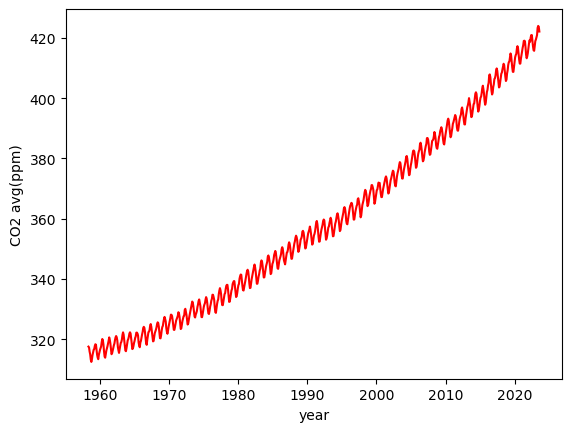

In [21]:
year=df[2]
plt.plot(year,mon_avg,color='red')
plt.xlabel('year')
plt.ylabel('CO2 avg(ppm)')
plt.show()

## Working on Rate

In [22]:
# Rate is defined as discreate difference of Co2avg/discreate difference of year.
#for discreate difference i use Pandas dataframe.diff()
df["Time"]=year.diff()# diff from rows default axis=0
df["Time"]

0         NaN
1      0.0849
2      0.0822
3      0.0849
4      0.0849
        ...  
778    0.0833
779    0.0834
780    0.0833
781    0.0833
782    0.0834
Name: Time, Length: 783, dtype: float64

In [23]:
#For Co2 avg
df["Co2_rate"]=mon_avg.diff()
df['Co2_rate']

0       NaN
1     -0.27
2     -1.38
3     -0.93
4     -1.73
       ... 
778    0.68
779    2.38
780    0.64
781   -0.32
782   -1.54
Name: Co2_rate, Length: 783, dtype: float64

In [25]:
#co2_rate
co2_rate=df['Co2_rate']/df["Time"]
co2_rate

0            NaN
1      -3.180212
2     -16.788321
3     -10.954064
4     -20.376914
         ...    
778     8.163265
779    28.537170
780     7.683073
781    -3.841537
782   -18.465228
Length: 783, dtype: float64

In [29]:
#Average
print(co2_rate.mean())

1.6180931338490303


Text(0, 0.5, 'CO2_Rate')

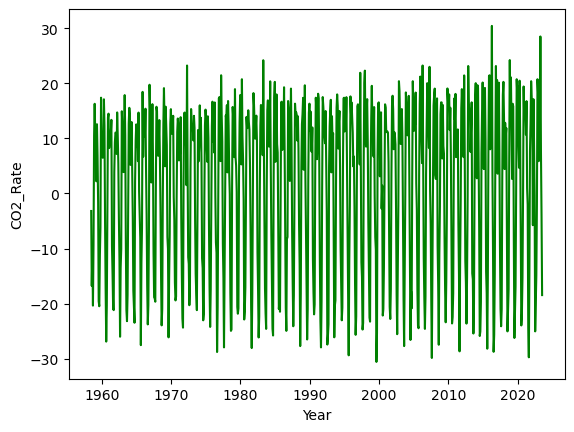

In [27]:
#Plot it
plt.plot(year,co2_rate,label="Rate change of CO2",color="green")
plt.xlabel("Year")
plt.ylabel("CO2_Rate")

In [40]:
#For analyse whether co2 is increase or not we need to identify by slope if slope is pos then inc else dec.

from scipy.stats import linregress
co2_rate=co2_rate.fillna(0)
df2=df[2].fillna(0)

In [42]:
slope=linregress(df2,co2_rate)
slope

LinregressResult(slope=0.03144636202423453, intercept=-60.99235057977976, rvalue=0.040100898582829725, pvalue=0.2623870558478312, stderr=0.028037631074109663, intercept_stderr=55.82423635353259)

## Slope is increasing so co2 rate is increasing